# BP:
Whether the client has subscribed a term deposit or not 

Attribute information For bank dataset

   Input variables:
   # bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   # related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# Loading data set
data = pd.read_csv('bank.csv',delimiter=';')

In [3]:
data.shape

(45211, 17)

In [4]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Removing unwanted column and nan values
data = data.drop(['contact','day','month','duration'],axis=1)

In [7]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Converting object-categorical-numeric
data[["job",'marital','education','default','housing','loan','poutcome','y']] = data[['job','marital','education','default','housing','loan','poutcome','y']].astype("category")

In [9]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   campaign   45211 non-null  int64   
 9   pdays      45211 non-null  int64   
 10  previous   45211 non-null  int64   
 11  poutcome   45211 non-null  category
 12  y          45211 non-null  category
dtypes: category(8), int64(5)
memory usage: 2.1 MB


In [10]:
df["job"] = df["job"].cat.codes
df["marital"] = df["marital"].cat.codes
df["education"] = df["education"].cat.codes
df["default"] = df["default"].cat.codes
df["housing"] = df["housing"].cat.codes
df["loan"] = df["loan"].cat.codes
df["poutcome"] = df["poutcome"].cat.codes
df["y"] = df["y"].cat.codes

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   campaign   45211 non-null  int64
 9   pdays      45211 non-null  int64
 10  previous   45211 non-null  int64
 11  poutcome   45211 non-null  int8 
 12  y          45211 non-null  int8 
dtypes: int64(5), int8(8)
memory usage: 2.1 MB


,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,1,-1,0,3,0


In [12]:
x = df.drop(['y'],axis=1)
y = df['y']


In [13]:
# Normalizing x

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = scaler.transform(x)

In [14]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [15]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [16]:
model.intercept_

array([-2.65410256])

In [17]:
model.coef_

array([[ 0.47401632,  0.16218312,  0.42399789,  0.55377566, -0.40314295,
         2.13088078, -0.9228621 , -0.56433926, -6.30888278,  3.09976882,
         4.20346338,  0.26212345]])

In [18]:
 model.predict_proba(x)

array([[0.90307314, 0.09692686],
       [0.90532143, 0.09467857],
       [0.96104398, 0.03895602],
       ...,
       [0.75295834, 0.24704166],
       [0.86735458, 0.13264542],
       [0.74513592, 0.25486408]])

In [19]:
y_pred = model.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

# Model Validation

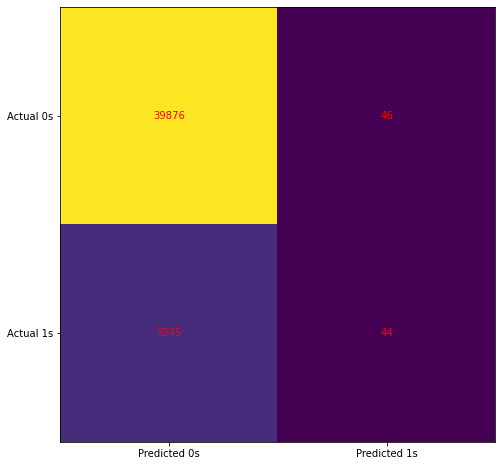

In [20]:
# Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
confusion_matrix = confusion_matrix(y,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()

In [21]:
cr = classification_report(y,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.49      0.01      0.02      5289

    accuracy                           0.88     45211
   macro avg       0.69      0.50      0.48     45211
weighted avg       0.84      0.88      0.83     45211



Text(0, 0.5, 'True Positive Rate')

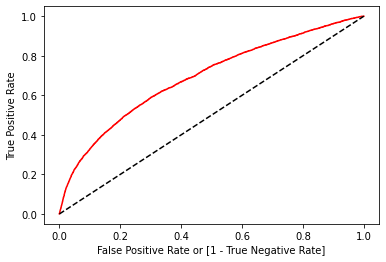

In [22]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [23]:
auc

0.5035834530387764

Improving model

In [24]:
model1 = LogisticRegression(solver='liblinear', C=20.0, random_state=0)
model1.fit(x, y)

LogisticRegression(C=20.0, random_state=0, solver='liblinear')

In [25]:
y_pred1 = model1.predict(x)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [26]:
model1.score(x, y)


0.8827940103072262

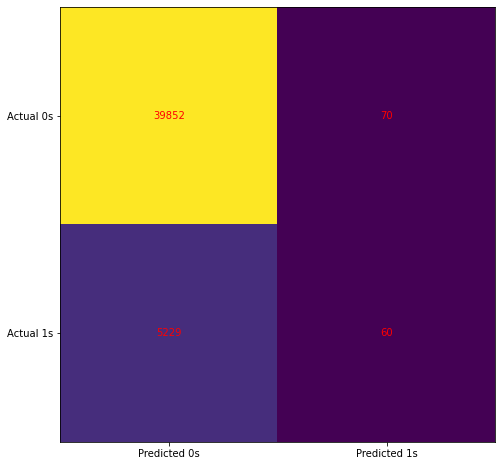

In [27]:
# Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
confusion_matrix = confusion_matrix(y,y_pred1)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()

In [28]:
cr = classification_report(y,y_pred1)
print(cr)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.46      0.01      0.02      5289

    accuracy                           0.88     45211
   macro avg       0.67      0.50      0.48     45211
weighted avg       0.83      0.88      0.83     45211



In [32]:
# Model2
from imblearn.over_sampling import SMOTE
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

clf = LogisticRegression()
clf.fit(x_train_res, y_train_res)

E:\exlern\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred2 =clf.predict(x)
y_pred2

array([0, 0, 0, ..., 1, 1, 1], dtype=int8)

In [36]:
clf.score(x, y)

0.6307756961801332

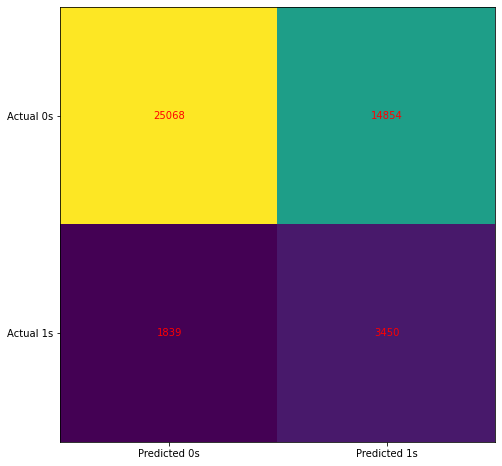

In [37]:
# Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
confusion_matrix = confusion_matrix(y,y_pred2)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()

In [38]:
cr = classification_report(y,y_pred2)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.63      0.75     39922
           1       0.19      0.65      0.29      5289

    accuracy                           0.63     45211
   macro avg       0.56      0.64      0.52     45211
weighted avg       0.84      0.63      0.70     45211



Text(0, 0.5, 'True Positive Rate')

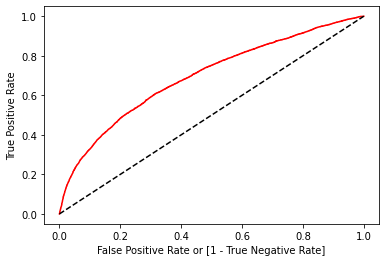

In [39]:
fpr, tpr, thresholds = roc_curve(y, clf.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred2)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [40]:
auc

0.6401108366646783